# BigMart Sales Analysis Project

## Introduction

Welcome to the BigMart Sales Analysis project! In this project, we delve into a comprehensive analysis of sales data from BigMart, a leading retail chain. The goal of this project is to explore, preprocess, and model the sales data to gain insights into the factors influencing sales and to develop predictive models for sales prediction.

Let's dive into the exciting world of BigMart sales data analysis and prediction!

In [1]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## Exploaray Data Analysis (EDA)

In [2]:
# Load and Explore the Data
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Check for missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Check for duplicated rows
duplicated_rows = train_data[train_data.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


In [8]:
# Get a list of numeric column names
numeric_columns = train_data.select_dtypes(include=[np.number]).columns

# Specify the Z-score threshold for identifying outliers
z_score_threshold = 4

# Loop through numeric columns and identify outliers
for numeric_column in numeric_columns:
    z_scores = zscore(train_data[numeric_column])
    outliers = train_data[abs(z_scores) > z_score_threshold]
    print(f"Number of outliers in {numeric_column}: {len(outliers)}")

Number of outliers in Item_Weight: 0
Number of outliers in Item_Visibility: 40
Number of outliers in Item_MRP: 0
Number of outliers in Outlet_Establishment_Year: 0
Number of outliers in Item_Outlet_Sales: 23


- Modifying and filling missing values based on conditions discovered while exploring the data in **Excel**

In [9]:
categorial_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorial_columns:
    print(f'The unique values of {col} column are:\n{train_data[col].unique()}')
    print()

The unique values of Item_Fat_Content column are:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

The unique values of Item_Type column are:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

The unique values of Outlet_Size column are:
['Medium' nan 'High' 'Small']

The unique values of Outlet_Location_Type column are:
['Tier 1' 'Tier 3' 'Tier 2']

The unique values of Outlet_Type column are:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



- We can notice that there are values with different typing but the same meaning in **Item_Fat_Content** column so we will modify this.

In [10]:
# Mapping variations of 'Low Fat' and 'Regular' to a consistent representation
fat_content_mapping = {'Low Fat': 'Low Fat', 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Regular': 'Regular', 'reg': 'Regular'}
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(fat_content_mapping)

- I discovered a relation between the missing values in the columns of **Outlet_Location_Type** and **Outlet_Type** and a relation between **Item_Weight** and **Item_Identifier** so I will make functions to handle the missing values.

In [11]:
def fill_missing_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        if row['Outlet_Location_Type'] == 'Tier 2' and row['Outlet_Type'] == 'Supermarket Type1':
            return 'Small'
        elif row['Outlet_Location_Type'] == 'Tier 3' and row['Outlet_Type'] == 'Grocery Store':
            return 'High'
        
    return row['Outlet_Size']

# Apply the function to fill missing values in 'Outlet_Size'
train_data['Outlet_Size'] = train_data.apply(fill_missing_outlet_size, axis=1)

In [12]:
# Calculate the overall mean of the Item_Weight column
overall_mean_item_weight = train_data['Item_Weight'].mean()

# Calculate the mean Item_Weight for each Item_Identifier
mean_item_weights = train_data.groupby('Item_Identifier')['Item_Weight'].mean()


# Fill missing Item_Weight values using the calculated mean values or overall mean
train_data['Item_Weight'] = train_data.apply(lambda row: mean_item_weights[row['Item_Identifier']]
                                             if pd.notnull(row['Item_Identifier']) and pd.notnull(row['Item_Weight'])
                                             else overall_mean_item_weight, axis=1)

#### Univariate Analysis

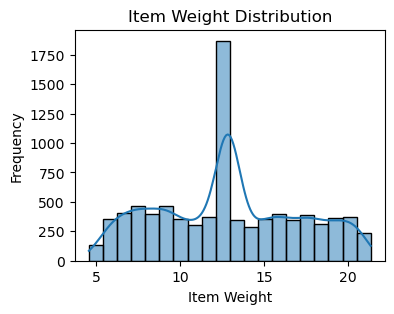

In [13]:
# Histogram of Item_Weight
plt.figure(figsize=(4, 3))
sns.histplot(train_data['Item_Weight'], bins=20, kde=True)
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

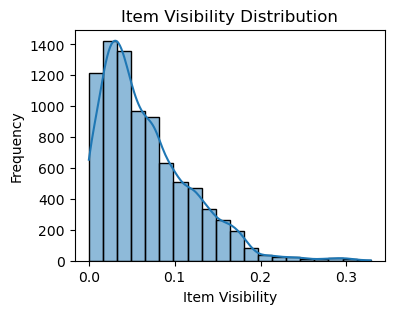

In [14]:
# Histogram of Item_Visibility
plt.figure(figsize=(4, 3))
sns.histplot(train_data['Item_Visibility'], bins=20, kde=True)
plt.title('Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

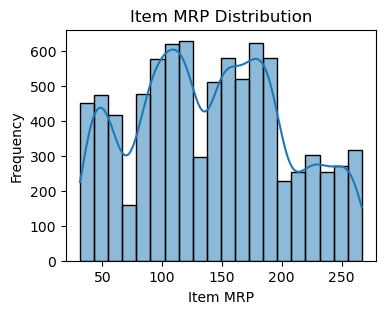

In [15]:
# Histogram of Item_MRP
plt.figure(figsize=(4, 3))
sns.histplot(train_data['Item_MRP'], bins=20, kde=True)
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

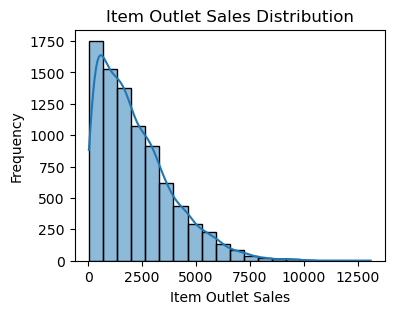

In [16]:
# Histogram for Item_Outlet_Sales
plt.figure(figsize=(4, 3))
sns.histplot(train_data['Item_Outlet_Sales'], bins=20, kde=True)
plt.title('Item Outlet Sales Distribution')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

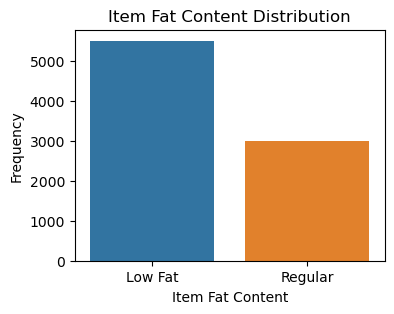

In [17]:
# Count plot of Item_Fat_Content
plt.figure(figsize=(4, 3))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.title('Item Fat Content Distribution')
plt.xlabel('Item Fat Content')
plt.ylabel('Frequency')
plt.show()

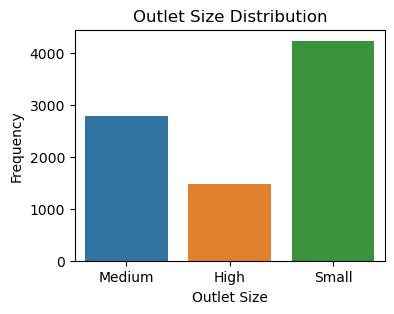

In [18]:
# Count plot of Outlet_Size
plt.figure(figsize=(4, 3))
sns.countplot(x='Outlet_Size', data=train_data)
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Frequency')
plt.show()

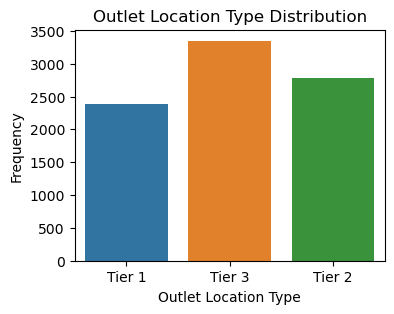

In [19]:
# Count plot of Outlet_Location_Type
plt.figure(figsize=(4, 3))
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.title('Outlet Location Type Distribution')
plt.xlabel('Outlet Location Type')
plt.ylabel('Frequency')
plt.show()

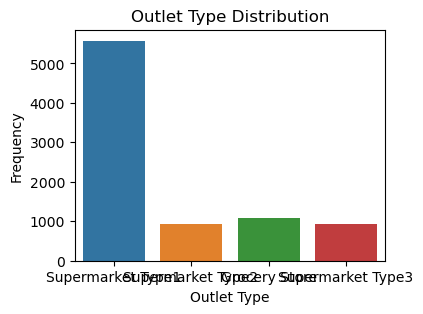

In [20]:
# Count plot of Outlet_Type
plt.figure(figsize=(4, 3))
sns.countplot(x='Outlet_Type', data=train_data)
plt.title('Outlet Type Distribution')
plt.xlabel('Outlet Type')
plt.ylabel('Frequency')
plt.show()

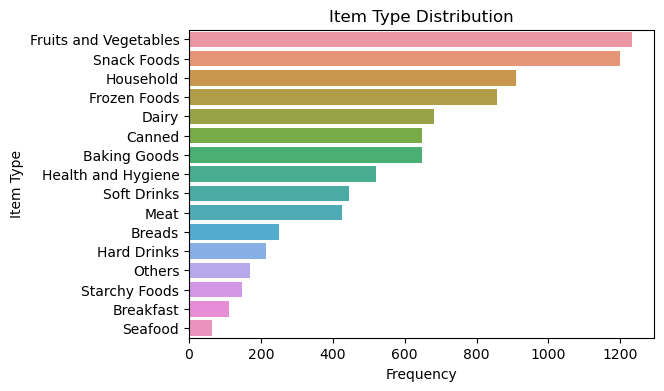

In [21]:
# Count plot of Item_Type (Horizontal and Sorted)
plt.figure(figsize=(6, 4))
sns.countplot(y='Item_Type', data=train_data, order=train_data['Item_Type'].value_counts().index)
plt.title('Item Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Item Type')
plt.show()

#### Bivariate Analysis

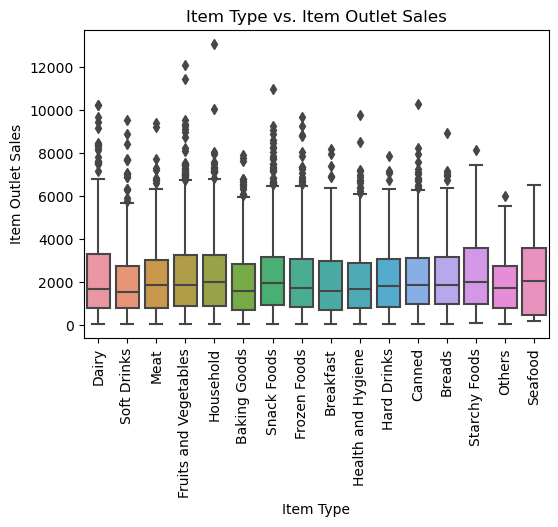

In [22]:
# Box plot of Item_Type vs. Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Item Type vs. Item Outlet Sales')
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.show()

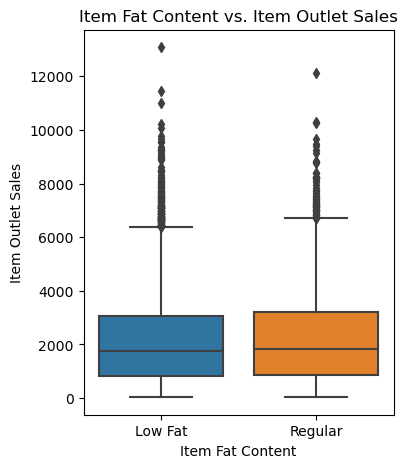

In [23]:
# Box plot of Item_Fat_Content vs. Item_Outlet_Sales
plt.figure(figsize=(4, 5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data)
plt.title('Item Fat Content vs. Item Outlet Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

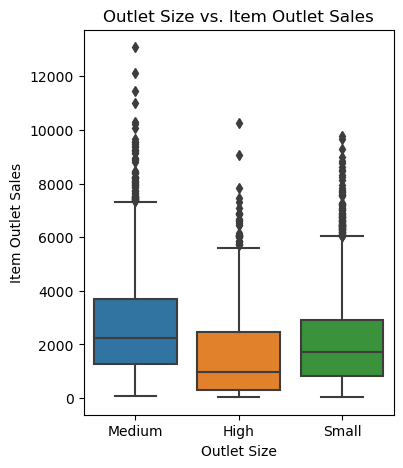

In [24]:
# Box plot of Outlet_Size vs. Item_Outlet_Sales
plt.figure(figsize=(4, 5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data)
plt.title('Outlet Size vs. Item Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

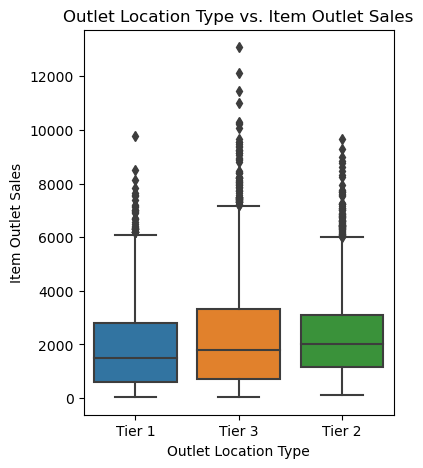

In [25]:
# Box plot of Outlet_Location_Type vs. Item_Outlet_Sales
plt.figure(figsize=(4, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Outlet Location Type vs. Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

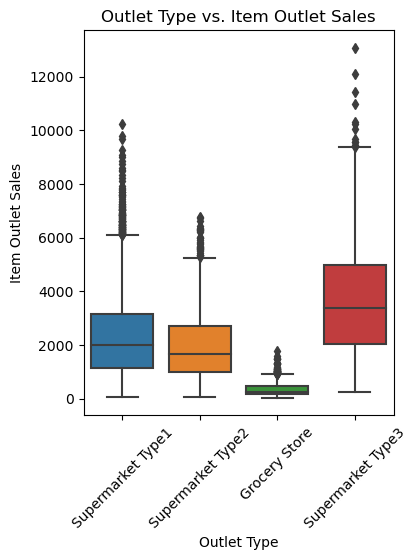

In [26]:
# Box plot of Outlet_Type vs. Item_Outlet_Sales
plt.figure(figsize=(4, 5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Outlet Type vs. Item Outlet Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

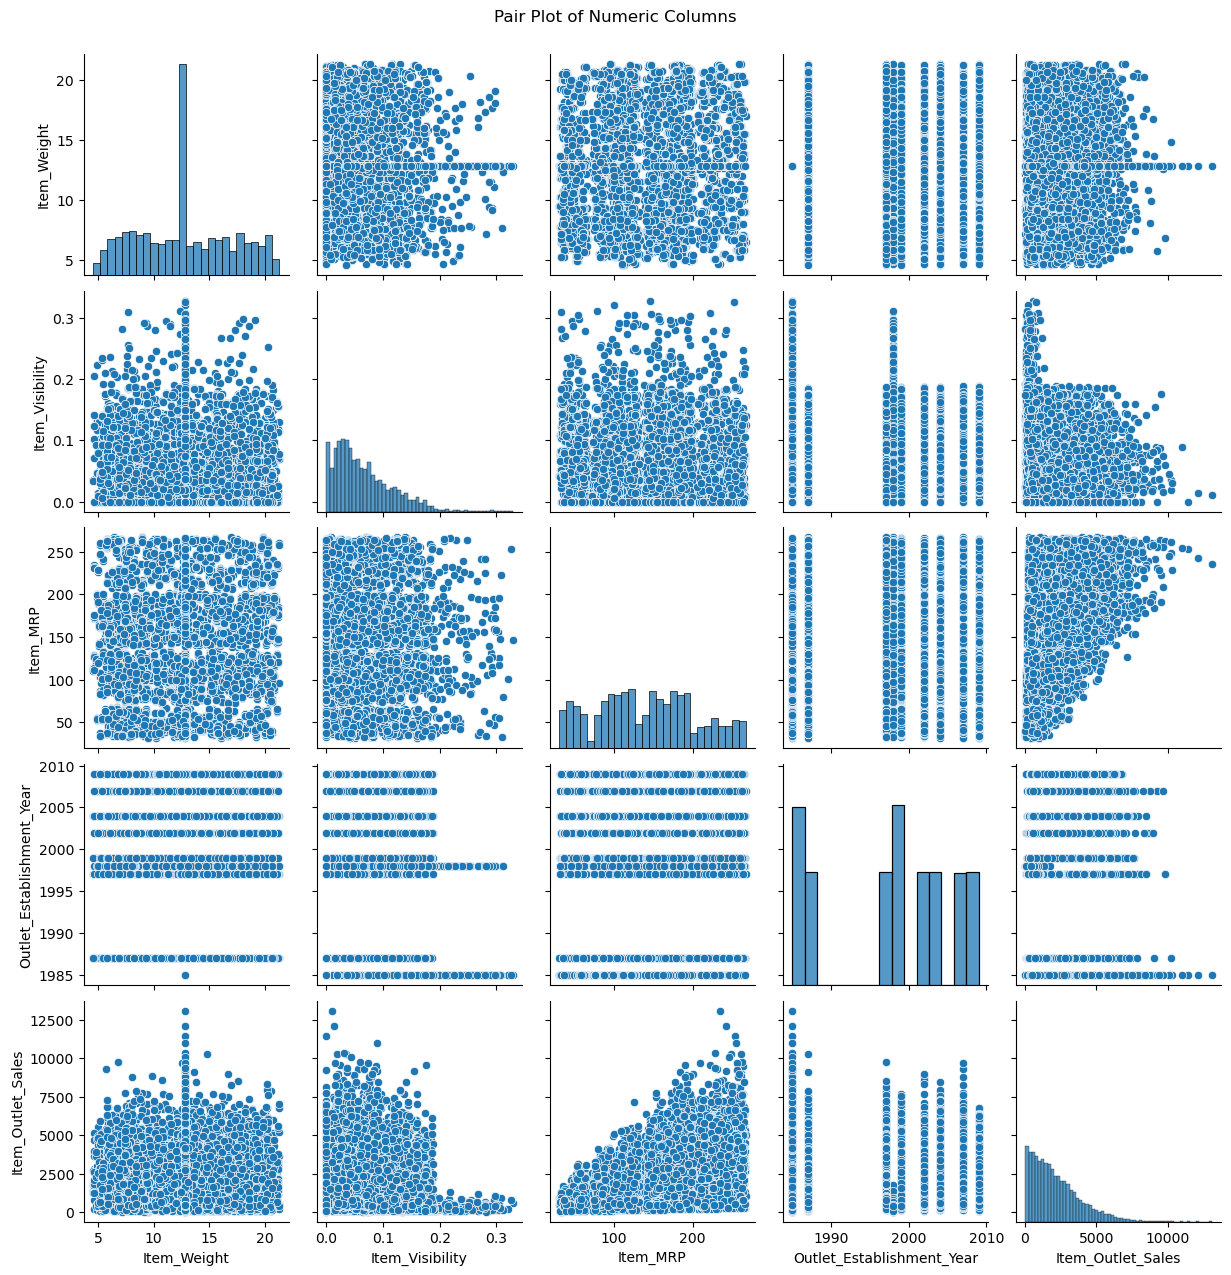

In [27]:
# Pair plot for numeric columns
sns.pairplot(train_data[numeric_columns])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

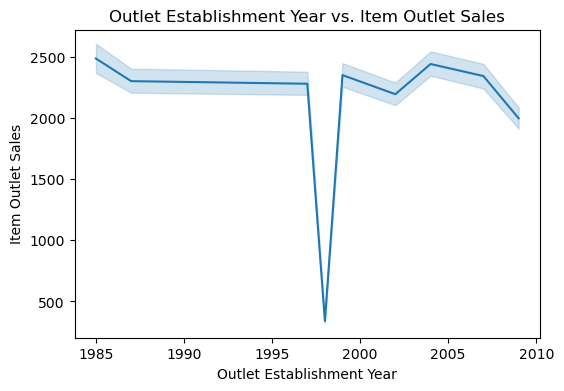

In [28]:
# Line chart of Outlet_Establishment_Year vs. Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data)
plt.title('Outlet Establishment Year vs. Item Outlet Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

In [29]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Feature Engineering

In [30]:
# Calculate the actual current year
current_year = datetime.now().year

In [31]:
# Create a new feature 'Outlet_Age' based on 'Outlet_Establishment_Year'
train_data['Outlet_Age'] = current_year - train_data['Outlet_Establishment_Year']

- Imputing outliers with **Winsorization** technique.

In [32]:
# Calculate the percentiles for Winsorization
lower_percentile = np.percentile(train_data['Item_Visibility'], 1)
upper_percentile = np.percentile(train_data['Item_Visibility'], 99)

# Apply Winsorization to the column
train_data['Item_Visibility'] = np.clip(train_data['Item_Visibility'], lower_percentile, upper_percentile)
train_data['Item_Outlet_Sales'] = np.clip(train_data['Item_Outlet_Sales'], lower_percentile, upper_percentile)

# Calculate Z-scores after Winsorization
z_scores = zscore(train_data['Item_Visibility'])
z_scores = zscore(train_data['Item_Outlet_Sales'])

# Count the number of outliers
outliers_count = np.sum(np.abs(z_scores) > z_score_threshold)

print("Number of current outliers after Winsorization:", outliers_count)

Number of current outliers after Winsorization: 0


In [33]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.226249,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.226249,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.226249,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,0.226249,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0.226249,36


## Data Preprocessing

- Making a fuction to preprocess the training data.

In [34]:
def preprocess_data(data):
    # Calculate the overall mean of the Item_Weight column
    overall_mean_item_weight = data['Item_Weight'].mean()

    # Calculate the mean Item_Weight for each Item_Identifier
    mean_item_weights = data.groupby('Item_Identifier')['Item_Weight'].mean()

    # Fill missing Item_Weight values using the calculated mean values or overall mean
    data['Item_Weight'] = data.apply(lambda row: mean_item_weights[row['Item_Identifier']]
                                                 if pd.notnull(row['Item_Identifier']) and pd.notnull(row['Item_Weight'])
                                                 else overall_mean_item_weight, axis=1)

    # Mapping variations of 'Low Fat' and 'Regular' to a consistent representation
    fat_content_mapping = {'Low Fat': 'Low Fat', 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Regular': 'Regular', 'reg': 'Regular'}
    data['Item_Fat_Content'] = data['Item_Fat_Content'].map(fat_content_mapping)

    # Mapping variations of 'Item Type' column to numerical values
    fat_content_mapping = {'Dairy': 0, 'Soft Drinks': 1, 'Meat': 2, 'Fruits and Vegetables': 3,
                           'Household': 4, 'Baking Goods': 5, 'Snack Foods': 6, 'Frozen Foods': 7,
                           'Breakfast': 8, 'Health and Hygiene': 9, 'Hard Drinks': 10, 'Canned': 11,
                           'Breads': 12, 'Starchy Foods': 13, 'Others': 14, 'Seafood': 15}
    data['Item_Type'] = data['Item_Type'].map(fat_content_mapping)

    # Apply the function we made earlier to fill missing values in 'Outlet_Size'
    data['Outlet_Size'] = data.apply(fill_missing_outlet_size, axis=1)

    # Impute outliers of Item_Visibility with Winsorization
    lower_percentile = np.percentile(data['Item_Visibility'], 1)
    upper_percentile = np.percentile(data['Item_Visibility'], 99)
    data['Item_Visibility'] = np.clip(data['Item_Visibility'], lower_percentile, upper_percentile)
        
    # Create a new feature 'Outlet_Age' based on 'Outlet_Establishment_Year'
    current_year = datetime.now().year
    data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']
    
    # Encode categorical variables using Label Encoding
    label_encoder = LabelEncoder()
    categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
    
    for col in categorical_columns:
        data[col] = label_encoder.fit_transform(data[col])

    # Standardize numerical features using StandardScaler
    numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
    scaler = StandardScaler()

    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    
    # Drop unnecessary columns
    data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

    # Split data into features (X) and target variable (y)
    X = data.drop('Item_Outlet_Sales', axis=1)
    y = data['Item_Outlet_Sales']
    
    return X, y, scaler

- Making a fuction to preprocess the test data.

In [35]:
def preprocess_test_data(test_data, train_data, scaler):
    # Calculate the overall mean of the Item_Weight column
    overall_mean_item_weight = test_data['Item_Weight'].mean()

    # Calculate the mean Item_Weight for each Item_Identifier
    mean_item_weights = test_data.groupby('Item_Identifier')['Item_Weight'].mean()

    # Fill missing Item_Weight values using the calculated mean values or overall mean
    test_data['Item_Weight'] = test_data.apply(lambda row: mean_item_weights[row['Item_Identifier']]
                                                 if pd.notnull(row['Item_Identifier']) and pd.notnull(row['Item_Weight'])
                                                 else overall_mean_item_weight, axis=1)

    # Mapping variations of 'Low Fat' and 'Regular' to a consistent representation
    fat_content_mapping = {'Low Fat': 'Low Fat', 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Regular': 'Regular', 'reg': 'Regular'}
    test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(fat_content_mapping)

    # Mapping variations of 'Item Type' column to numerical values
    fat_content_mapping = {'Dairy': 0, 'Soft Drinks': 1, 'Meat': 2, 'Fruits and Vegetables': 3,
                           'Household': 4, 'Baking Goods': 5, 'Snack Foods': 6, 'Frozen Foods': 7,
                           'Breakfast': 8, 'Health and Hygiene': 9, 'Hard Drinks': 10, 'Canned': 11,
                           'Breads': 12, 'Starchy Foods': 13, 'Others': 14, 'Seafood': 15}
    test_data['Item_Type'] = test_data['Item_Type'].map(fat_content_mapping)
    
    # Apply the function to fill missing values in 'Outlet_Size'
    test_data['Outlet_Size'] = test_data.apply(fill_missing_outlet_size, axis=1)

    # Impute outliers of Item_Visibility with Winsorization
    lower_percentile = np.percentile(test_data['Item_Visibility'], 1)
    upper_percentile = np.percentile(test_data['Item_Visibility'], 99)
    test_data['Item_Visibility'] = np.clip(test_data['Item_Visibility'], lower_percentile, upper_percentile)

    # Create a new feature 'Outlet_Age' based on 'Outlet_Establishment_Year'
    current_year = datetime.now().year
    test_data['Outlet_Age'] = current_year - test_data['Outlet_Establishment_Year']

    # Encode categorical variables using Label Encoding (using label_encoder from train_data)
    label_encoder = LabelEncoder()
    categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
    
    for col in categorical_columns:
        test_data[col] = label_encoder.fit_transform(test_data[col])

    # Standardize numerical features using StandardScaler (using scaler from train_data)
    numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']    
    test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])
    
    # Drop unnecessary columns
    test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

    return test_data

In [36]:
# Load and preprocess training data
train_data = pd.read_csv('Train.csv')
X_train, y_train, scaler = preprocess_data(train_data)

# Load and preprocess test data
test_data = pd.read_csv('Test.csv')
X_test = preprocess_test_data(test_data, X_train, scaler)

## Modeling

#### Linear Regression Model

In [37]:
# Initialize and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#### Regularized Linear Regression Model

In [38]:
# Initialize and train a Ridge Regression model with alpha (regularization strength) parameter
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [39]:
# Initialize and train a Lasso Regression model with alpha (regularization strength) parameter
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

#### Random Forest Model

In [40]:
# Initialize and train a RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### XGBoost Model

In [41]:
# Initialize and train an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

## Models Evaluation

In [42]:
models = {
    'Linear Regression': lr_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model,
    'RandomForest': rf_model,
    'XGBoost': xgb_model
    }

# Initialize dictionaries to store evaluation metrics
rmse_scores = {}
r2_scores = {}

# Evaluate models using cross-validation and multiple metrics
for name, model in models.items():
    # Cross-validation scores for RMSE
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    rmse_scores[name] = cv_rmse.mean()
    
    # Cross-validation scores for R-squared
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_scores[name] = cv_r2.mean()

# Print RMSE and R-squared scores for each model
for name in models:
    print(f"{name} - RMSE: {rmse_scores[name]}, R-squared: {r2_scores[name]}")

Linear Regression - RMSE: 1208.1623558909357, R-squared: 0.4981654495835185
Ridge - RMSE: 1208.1639590636867, R-squared: 0.4981655142696983
Lasso - RMSE: 1208.1622502075197, R-squared: 0.49816825865787484
RandomForest - RMSE: 1139.4421184883083, R-squared: 0.5530921267844302
XGBoost - RMSE: 1170.4717726775827, R-squared: 0.5284210464953822


- The Random Forest Model has the lowest RMSE and th heighest R-squared so we will use it for prediction.

## Hyperparameter Tuning for Random Forest Model

In [43]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding RMSE score
print("Best Hyperparameters for RandomForest:", grid_search.best_params_)
print("Best RMSE score:", np.sqrt(-grid_search.best_score_))

Best Hyperparameters for RandomForest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE score: 1082.4343864032908


- Using the best model.

In [44]:
# Create a RandomForest model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model on the entire training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

## Saving the Best Model

In [45]:
# Save the best Random Forest model to a file
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [46]:
# Load the saved Random Forest model from the file
loaded_rf_model = joblib.load('best_rf_model.pkl')

In [47]:
# Use the best model to make predictions on the test data
predictions = loaded_rf_model.predict(X_test)

# Inverse transform standardized numerical values to their original scale
original_numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
original_numerical_values = scaler.inverse_transform(X_test[original_numerical_columns])

# Create a DataFrame with the original numerical values
original_numerical_df = pd.DataFrame(original_numerical_values, columns=original_numerical_columns)

# Create a submission DataFrame
categorical_columns = pd.DataFrame({'Item_Fat_Content': X_test['Item_Fat_Content'], 'Item_Type': X_test['Item_Type'],
                           'Outlet_Establishment_Year': X_test['Outlet_Establishment_Year'], 'Outlet_Size': X_test['Outlet_Size'],
                           'Outlet_Location_Type': X_test['Outlet_Location_Type'], 'Outlet_Type': X_test['Outlet_Type'],
                           'Item_Outlet_Sales': predictions})

# Convert the numerical values to categorical again
size_mapping = {0: 'Small', 1: 'Medium', 2: 'High'}
categorical_columns['Outlet_Size'] = categorical_columns['Outlet_Size'].map(size_mapping)

fat_content_mapping = {0: 'Low Fat', 1: 'Regular'}
categorical_columns['Item_Fat_Content'] = categorical_columns['Item_Fat_Content'].map(fat_content_mapping)

outlet_Location_mapping = {0: 'Tier 1', 1: 'Tier 2', 2: 'Tier 3'}
categorical_columns['Outlet_Location_Type'] = categorical_columns['Outlet_Location_Type'].map(outlet_Location_mapping)

outlet_type_mapping = {0: 'Grocery Store', 1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3'}
categorical_columns['Outlet_Type'] = categorical_columns['Outlet_Type'].map(outlet_type_mapping)

item_type_mapping = {0: 'Dairy', 1: 'Soft Drinks', 2: 'Meat', 3: 'Fruits and Vegetables',
                     4: 'Household', 5: 'Baking Goods', 6: 'Snack Foods', 7: 'Frozen Foods',
                     8: 'Breakfast', 9: 'Health and Hygiene', 10: 'Hard Drinks', 11: 'Canned',
                     12: 'Breads', 13: 'Starchy Foods', 14: 'Others', 15: 'Seafood'}
categorical_columns['Item_Type'] = categorical_columns['Item_Type'].map(item_type_mapping)

# Combine the original numerical values DataFrame with the categorical columns from X_test
submission_df = pd.concat([categorical_columns, original_numerical_df], axis=1)

# Add the predictions column
submission_df['Item_Outlet_Sales'] = predictions

# Merge the submission DataFrame with the original numerical values DataFrame
submission = pd.merge(submission_df, test_data[['Item_Identifier', 'Outlet_Identifier']], left_index=True, right_index=True)

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [48]:
submission = pd.read_csv('submission.csv')
submission.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier
0,Low Fat,Snack Foods,1999,Medium,Tier 1,Supermarket Type1,1570.231387,20.750000,0.007565,107.8622,24.0,FDW58,OUT049
1,Regular,Dairy,2007,High,Tier 2,Supermarket Type1,1442.181805,8.300000,0.038428,87.3198,16.0,FDW14,OUT017
2,Low Fat,Others,1998,Small,Tier 3,Grocery Store,552.544814,14.600000,0.099575,241.7538,25.0,NCN55,OUT010
3,Low Fat,Snack Foods,2007,High,Tier 2,Supermarket Type1,2504.973086,7.315000,0.015388,155.0340,16.0,FDQ58,OUT017
4,Regular,Dairy,1985,Medium,Tier 3,Supermarket Type3,6286.980793,12.695633,0.118599,234.2300,38.0,FDY38,OUT027


## Summary

In this notebook, we performed an exploratory data analysis and built predictive models for the BigMart sales dataset. Our analysis and modeling can be summarized as follows:

1. **Data Loading and Exploration**: We loaded the dataset and examined its structure, missing values, and duplicated rows. We explored the distribution of numeric columns and identified outliers using Z-scores.

2. **Data Visualization**: We visualized the distribution of key features such as Item_MRP and Item_Outlet_Sales. We also created scatter plots and count plots to understand the relationships between different variables.

3. **Feature Engineering**: We encoded categorical variables, performed imputation for missing values, and standardized numerical features.

4. **Model Building**: We trained and evaluated several regression models including Linear Regression, Regulaized Linear Regression (Ridge & Lasso), RandomForest, and XGBoost. We performed hyperparameter tuning using GridSearchCV and selected the best-performing model.

5. **Model Evaluation**: We evaluated the models using cross-validation and calculated RMSE and R-squared scores. RandomForest emerged as the best model with the lowest RMSE.

6. **Outlier Handling**: We identified outliers and explored strategies to handle them. Finally, we imputed the outliers by the means of their columns.

7. **Conclusion**: Our analysis suggests that the RandomForest model performs the best for predicting Item_Outlet_Sales. We observed interesting patterns in the data and gained insights into feature importance. Outlier handling and feature engineering played a crucial role in model performance.

8. **Saving the Model**: We saved the best model and used it to predict the **Test** data.

Overall, this notebook lays the foundation for predicting BigMart sales and offers valuable insights into the data.